In [36]:
%matplotlib inline

import numpy, math 
import matplotlib.pyplot as plt

The function below uses the inverse CDF (calculated analytically) of each of the marginal distributions to generate new values of x and y.  The inverse function takes a random number from Unif(0,1) as an argument.  

After the initial x and y are set, since the distributions for x and y depend on the other variable, x and y are calculated from the previous values of the inverse CDF.  These are all stored in a matrix a, where x values are in the first column and y values are in the second column.

The expected value of x as predicted by the Gibbs sampler is the average of all the x values generated by it.

In [37]:
def gibbs(N,thin,B):
    x=numpy.random.uniform()
    y=numpy.random.uniform()
    a = numpy.zeros(shape=(N,2))
    for i in range(N):
        for j in range(thin):
            U = numpy.random.uniform()
            a[i] = ((-1/y)*math.log(1-U*(1-math.exp(-B*y))),(-1/x)*math.log(1-U*(1-math.exp(-B*x))))
            y = (-1/x)*math.log(1-U*(1-math.exp(-B*x)))
            x = (-1/y)*math.log(1-U*(1-math.exp(-B*y)))
    return(a)

x Expectation = 1.10283402197


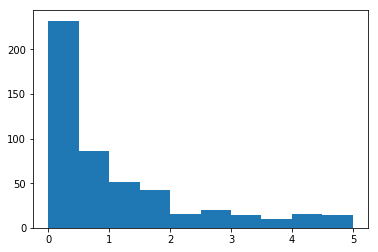

In [47]:
a = gibbs(500,10,5)
plt.hist([row[0] for row in a])
print("x Expectation =", numpy.mean([row[0] for row in a]))

x Expectation = 1.08708006519


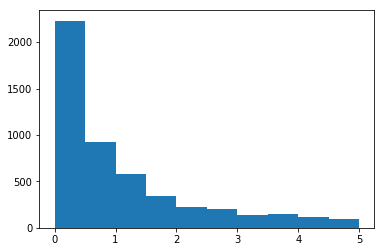

In [48]:
a = gibbs(5000,10,5)
plt.hist([row[0] for row in a])
print("x Expectation =", numpy.mean([row[0] for row in a]))

x Expectation = 1.06346929609


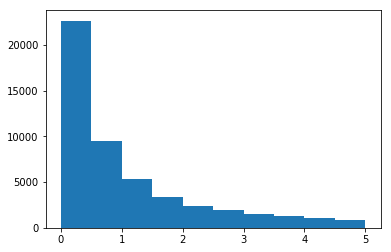

In [49]:
a = gibbs(50000,10,5)
plt.hist([row[0] for row in a])
print("x Expectation =", numpy.mean([row[0] for row in a]))